<a href="https://colab.research.google.com/github/cysorianoc/IBM_Data_Science/blob/main/Course_8_Module_5_Practice_Interactive_Dash_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Dashboard and Expected Layout

## Components of the Dashboard

- **Select Region**  
- **Select Year**  
- **Division to Display**  

### Charts to Display:
1. **Pie Chart**: Display Monthly Average Estimated Fire Area for the selected region in the selected year.
2. **Bar Chart**: Display Monthly Average Count of Pixels for Presumed Vegetation Fires for the selected region in the selected year.


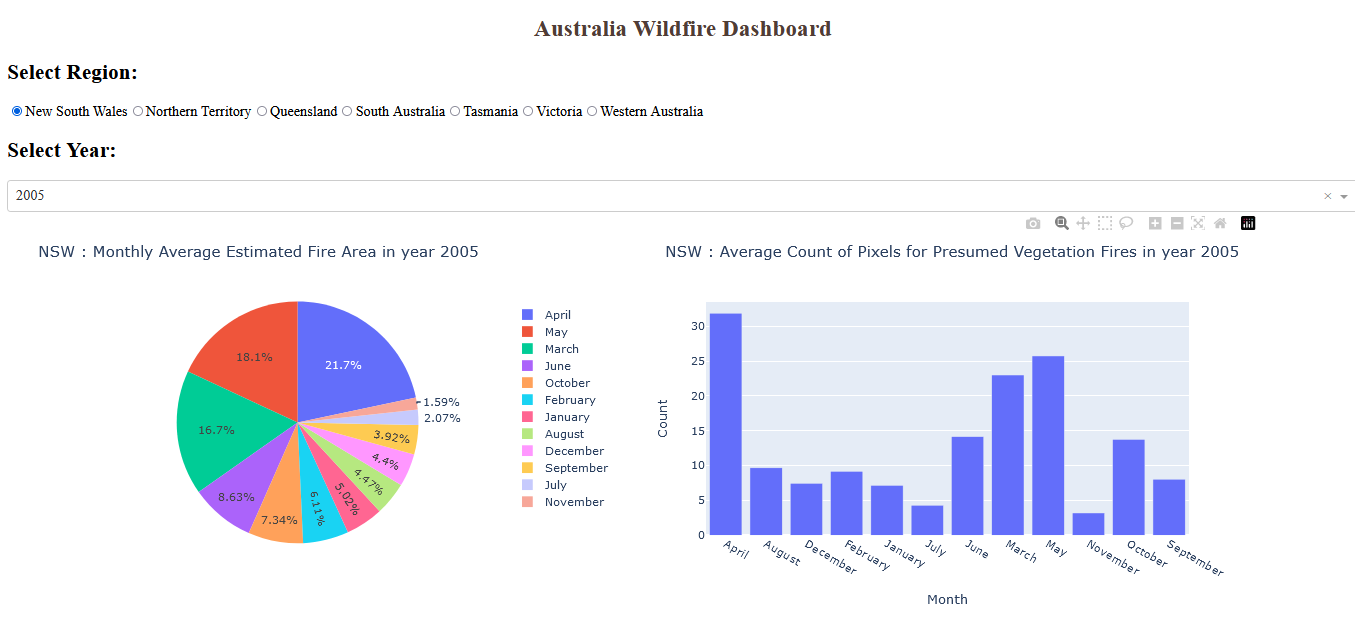

# Requirements to Create the Expected Result

## Components
- **A dropdown menu**: For choosing the year
- **A radio item**: For choosing the region

## Layout Design:
- **Outer Division**: Contains two inner divisions:
  - **Inner Division 1**: Displays the input components (radio item and dropdown)
  - **Inner Division 2**: Displays the output components (pie chart and bar chart)

## Callback Function:
- Compute data, create graphs, and return them to the layout.

---

## Steps to Implement:

1. **Import Required Libraries**  
   - Import necessary libraries such as `dash`, `dash_core_components`, `dash_html_components`, `pandas`, `plotly`, etc.

2. **Read the Dataset**  
   - Load the provided wildfire dataset using `pandas`.

3. **Create an Application Layout**  
   - Define the overall structure of the app layout, including the outer and inner divisions.

4. **Add Title to the Dashboard**  
   - Use `html.H1` to add a title to the dashboard.

5. **Add Radio Item and Dropdown**  
   - Use `dcc.RadioItems` for selecting the region.
   - Use `dcc.Dropdown` for selecting the year.

6. **Add Pie Chart and Bar Chart**  
   - Use `dcc.Graph` to add the pie chart and bar chart components for output.

7. **Define the Callback Function**  
   - Set up a callback function using `@app.callback` to process input values, generate graphs, and return the output to the layout.

8. **Run the App**  
   - Use `app.run_server()` to run the Dash app and display the dashboard.


In [2]:
pip install jupyter-dash -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 11.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt
#Create app
app = dash.Dash(__name__)
#Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True
# Read the wildfire data into pandas dataframe
df =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')
#Extract year and month from the date column
df['Month'] = pd.to_datetime(df['Date']).dt.month_name() #used for the names of the months
df['Year'] = pd.to_datetime(df['Date']).dt.year
#Layout Section of Dash
#Task 1 Add the Title to the Dashboard
app.layout = html.Div(children=[html.H1('Australia Wildfire Dashboard',
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 26}),
# TASK 2: Add the radio items and a dropdown right below the first inner division
     #outer division starts
     html.Div([
                   # First inner divsion for  adding dropdown helper text for Selected Drive wheels
                    html.Div([
                            html.H2('Select Region:', style={'margin-right': '2em'}),

                    #Radio items to select the region
                    #dcc.RadioItems(['NSW','QL','SA','TA','VI','WA'], 'NSW', id='region',inline=True)]),
                    dcc.RadioItems([{"label":"New South Wales","value": "NSW"},
                                    {"label":"Northern Territory","value": "NT"},
                                    {"label":"Queensland","value": "QL"},
                                    {"label":"South Australia","value": "SA"},
                                    {"label":"Tasmania","value": "TA"},
                                    {"label":"Victoria","value": "VI"},
                                    {"label":"Western Australia","value": "WA"}],"NSW", id='region',inline=True)]),
                    #Dropdown to select year
                    html.Div([
                            html.H2('Select Year:', style={'margin-right': '2em'}),
                        dcc.Dropdown(df.Year.unique(), value = 2005,id='year')
                    ]),
#TASK 3: Add two empty divisions for output inside the next inner division.
         #Second Inner division for adding 2 inner divisions for 2 output graphs
                    html.Div([

                        html.Div([ ], id='plot1'),
                        html.Div([ ], id='plot2')
                    ], style={'display': 'flex'}),

    ])
    #outer division ends

])
#layout ends
#TASK 4: Add the Ouput and input components inside the app.callback decorator.
#Place to add @app.callback Decorator
@app.callback([Output(component_id='plot1', component_property='children'),
               Output(component_id='plot2', component_property='children')],
               [Input(component_id='region', component_property='value'),
                Input(component_id='year', component_property='value')])
#TASK 5: Add the callback function.
#Place to define the callback function .
def reg_year_display(input_region,input_year):
    #data
   region_data = df[df['Region'] == input_region]
   y_r_data = region_data[region_data['Year']==input_year]
    #Plot one - Monthly Average Estimated Fire Area
   est_data = y_r_data.groupby('Month')['Estimated_fire_area'].mean().reset_index()
   fig1 = px.pie(est_data, values='Estimated_fire_area', names='Month', title="{} : Monthly Average Estimated Fire Area in year {}".format(input_region,input_year))
     #Plot two - Monthly Average Count of Pixels for Presumed Vegetation Fires
   veg_data = y_r_data.groupby('Month')['Count'].mean().reset_index()
   fig2 = px.bar(veg_data, x='Month', y='Count', title='{} : Average Count of Pixels for Presumed Vegetation Fires in year {}'.format(input_region,input_year))
   return [dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2) ]
if __name__ == '__main__':
    app.run_server()


<IPython.core.display.Javascript object>

In [ ]:
import dash
import pandas as pd
import plotly.express as px
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
app.title = "Automobile Statistics Dashboard"

# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# List of years
year_list = [i for i in range(1980, 2024, 1)]

# Create the layout of the app
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center', 'color':'#503D36' , 'font-size':24 }),

    # Add two dropdown menus
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder='Select a report type'
        )
    ]),

    # Year dropdown, initially disabled
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value=2020,
            disabled=False
        )
    ]),

    # Output display division
    html.Div(id='output-container', className='output-container', style={'display': 'flex', 'flexWrap': 'wrap'})
])

# Callback function to update the year dropdown based on selected statistics
@app.callback(
    Output('select-year', 'disabled'),
    Input('dropdown-statistics', 'value')
)
def update_input_container(selected_statistics):
    return False if selected_statistics == 'Yearly Statistics' else True

# Callback for plotting
@app.callback(
    Output('output-container', 'children'),
    [Input('dropdown-statistics', 'value'), Input('select-year', 'value')]
)
def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        # Filter data for recession periods
        recession_data = data[data['Recession'] == 1]

        # Plot 1: Automobile sales fluctuate over Recession Period (year-wise)
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, x='Year', y='Automobile_Sales',
                           title="Average Automobile Sales Fluctuation Over Recession Period")
        )

        # Plot 2: Average number of vehicles sold by vehicle type
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales',
                          title="Average Number of Vehicles Sold by Vehicle Type During Recessions")
        )

        # Plot 3: Pie chart for total expenditure share by vehicle type during recessions
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec, names='Vehicle_Type', values='Advertising_Expenditure',
                          title="Total Expenditure Share by Vehicle Type During Recessions")
        )

        # Plot 4: Bar chart for the effect of unemployment rate on vehicle type and sales
        unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemp_data, x='unemployment_rate', y='Automobile_Sales', color='Vehicle_Type',
                          labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
                          title="Effect of Unemployment Rate on Vehicle Type and Sales")
        )

        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)], style={'display': 'flex'})
        ]

    elif selected_statistics == 'Yearly Statistics':
        # Filter data for the selected year
        yearly_data = data[data['Year'] == input_year]

        # Plot 1: Yearly Automobile sales using line chart for the whole period
        yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas, x='Year', y='Automobile_Sales',
                           title="Yearly Average Automobile Sales")
        )

        # Plot 2: Total Monthly Automobile sales using line chart
        mas = data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(mas, x='Month', y='Automobile_Sales',
                           title="Total Monthly Automobile Sales")
        )

        # Plot 3: Average number of vehicles sold by vehicle type in the selected year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',
                          title=f"Average Vehicles Sold by Vehicle Type in the Year {input_year}")
        )

        # Plot 4: Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data, names='Vehicle_Type', values='Advertising_Expenditure',
                          title=f"Total Advertisement Expenditure for Each Vehicle in {input_year}")
        )

        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
        ]

    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import dash
import pandas as pd
import plotly.express as px
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
app.title = "Automobile Statistics Dashboard"

# List of years
year_list = [i for i in range(1980, 2024, 1)]

# Create the layout of the app
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center'}),

    # Dropdown for selecting Report Type
    html.Div([
        html.Label("Select Report Type:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            placeholder='Select a report type',
            value='Select Statistics',
            style={
                'width': '80%',
                'padding': '3px',
                'font-size': '20px',
                'text-align-last': 'center'
            }
        )
    ], style={'width': '100%', 'margin': '20px 0'}),

    # Dropdown for selecting Year
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            placeholder='Select a year',
            value='Select Year',
            style={
                'width': '80%',
                'padding': '3px',
                'font-size': '20px',
                'text-align-last': 'center'
            }
        )
    ], style={'width': '100%', 'margin': '20px 0'}),

    # Output display division
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex', 'flexWrap': 'wrap'})
])

# Callback function to update the year dropdown based on selected statistics
@app.callback(
    Output('select-year', 'disabled'),
    Input('dropdown-statistics', 'value')
)
def update_input_container(selected_statistics):
    return False if selected_statistics == 'Yearly Statistics' else True

# Callback for plotting
@app.callback(
    Output('output-container', 'children'),
    [Input('dropdown-statistics', 'value'), Input('select-year', 'value')]
)
def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        # Filter data for recession periods
        recession_data = data[data['Recession'] == 1]

        # Plot 1: Automobile sales fluctuate over Recession Period (year-wise)
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, x='Year', y='Automobile_Sales',
                           title="Average Automobile Sales Fluctuation Over Recession Period")
        )

        # Plot 2: Average number of vehicles sold by vehicle type
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales',
                          title="Average Number of Vehicles Sold by Vehicle Type During Recessions")
        )

        # Plot 3: Pie chart for total expenditure share by vehicle type during recessions
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec, names='Vehicle_Type', values='Advertising_Expenditure',
                          title="Total Expenditure Share by Vehicle Type During Recessions")
        )

        # Plot 4: Bar chart for the effect of unemployment rate on vehicle type and sales
        unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemp_data, x='unemployment_rate', y='Automobile_Sales', color='Vehicle_Type',
                          labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
                          title="Effect of Unemployment Rate on Vehicle Type and Sales")
        )

        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)], style={'display': 'flex'})
        ]

    elif selected_statistics == 'Yearly Statistics':
        # Filter data for the selected year
        yearly_data = data[data['Year'] == input_year]

        # Plot 1: Yearly Automobile sales using line chart for the whole period
        yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas, x='Year', y='Automobile_Sales',
                           title="Yearly Average Automobile Sales")
        )

        # Plot 2: Total Monthly Automobile sales using line chart
        mas = data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(mas, x='Month', y='Automobile_Sales',
                           title="Total Monthly Automobile Sales")
        )

        # Plot 3: Average number of vehicles sold by vehicle type in the selected year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',
                          title=f"Average Vehicles Sold by Vehicle Type in the Year {input_year}")
        )

        # Plot 4: Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data, names='Vehicle_Type', values='Advertising_Expenditure',
                          title=f"Total Advertisement Expenditure for Each Vehicle in {input_year}")
        )

        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
        ]

    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [3]:
import dash
import more_itertools
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
# app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center'}), # Include style for title

    #TASK 2.2: Add two dropdown menus
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Select Statistics',
            placeholder='Select a report type',
            style={
                'width': '80%',
                'padding': '3px',
                'font-size': '20px',
                'text-align-last': 'center'
            }
        )
    ], style={'width': '100%', 'margin': '20px 0'}),

    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='Select Year',
            placeholder='Select a year',
            style={
                'width': '80%',
                'padding': '3px',
                'font-size': '20px',
                'text-align-last': 'center'
            }
        )
    ], style={'width': '100%', 'margin': '20px 0'}),

    #TASK 2.3: Add a division for output display
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex', 'flexWrap': 'wrap'})
])

# TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output('select-year', 'disabled'),
    Input('dropdown-statistics', 'value')
)
def update_input_container(selected_statistics):
    # Disable the year dropdown if "Recession Period Statistics" is selected
    if selected_statistics == 'Yearly Statistics':
        return False
    else:
        return True

# Callback for plotting
@app.callback(
    Output('output-container', 'children'),
    [Input('dropdown-statistics', 'value'), Input('select-year', 'value')]
)
def update_output_container(selected_statistics, input_year):
    #TASK 2.5: Create and display graphs for Recession Report Statistics
    if selected_statistics == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]

        # Plot 1: Automobile sales fluctuate over Recession Period (year-wise)
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, x='Year', y='Automobile_Sales',
                           title="Average Automobile Sales Fluctuation Over Recession Period")
        )

        # Plot 2: Average number of vehicles sold by vehicle type
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales',
                          title="Average Number of Vehicles Sold by Vehicle Type During Recessions")
        )

        # Plot 3: Pie chart for total expenditure share by vehicle type during recessions
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec, names='Vehicle_Type', values='Advertising_Expenditure',
                          title="Total Expenditure Share by Vehicle Type During Recessions")
        )

        # Plot 4: Bar chart for the effect of unemployment rate on vehicle type and sales
        unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemp_data, x='unemployment_rate', y='Automobile_Sales', color='Vehicle_Type',
                          labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
                          title="Effect of Unemployment Rate on Vehicle Type and Sales")
        )

        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)], style={'display': 'flex'})
        ]

    #TASK 2.6: Create and display graphs for Yearly Report Statistics
    elif selected_statistics == 'Yearly Statistics' and input_year:
        # Filter data for the selected year
        yearly_data = data[data['Year'] == input_year]

        # Plot 1: Yearly Automobile sales using line chart for the whole period
        yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas, x='Year', y='Automobile_Sales',
                           title="Yearly Average Automobile Sales")
        )

        # Plot 2: Total Monthly Automobile sales using line chart
        mas = data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(mas, x='Month', y='Automobile_Sales',
                           title="Total Monthly Automobile Sales")
        )

        # Plot 3: Average number of vehicles sold by vehicle type in the selected year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',
                          title=f"Average Vehicles Sold by Vehicle Type in the Year {input_year}")
        )

        # Plot 4: Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data, names='Vehicle_Type', values='Advertising_Expenditure',
                          title=f"Total Advertisement Expenditure for Each Vehicle in {input_year}")
        )

        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
        ]

    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>